<center>
<h1>Actualización de firmware UNMotor y UNThermal</h1>
<h2>Universidad Nacional de Colombia</h2>
<h2>Laboratorio de Control</h2>
</center>

<h1 id="instalacion-de-platformio">Instalación de PlatformIO</h1>

---

1. Desde Visual Studio Code, buscar la extención "PlatformIO" e instalarla:

    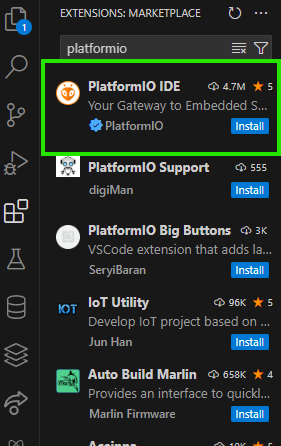

    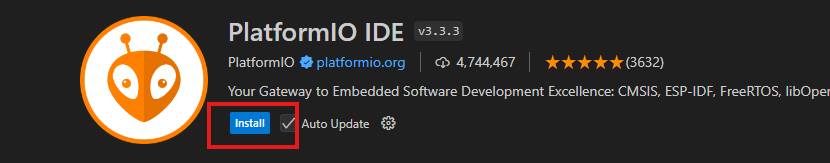

<h1 id="actualizacion-del-firmware">Actualización del firmware</h1>

---

Este proceso es necesario para configurar correctamente las plantas. Se debe realizar para cada una de ella:


### Clonar repositorios:

Desde una terminal (o Bash de Git) clonar los repositorios que se usarán durante el curso:

Planta termica:

<code>git clone https://github.com/nebisman/UNThermal.git</code>

Planta Motor DC:

<code>git clone https://github.com/nebisman/UNDCMotor.git</code>

### Cargar firmware de las plantas:
1. Dirijase a la extención de PlatformIO

    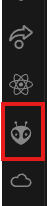

2. Abra el proyecto de PlatformIO, en cada repositorio se encuentra en la dirección "/code/esp32_<nombre_del_proyecto>"

    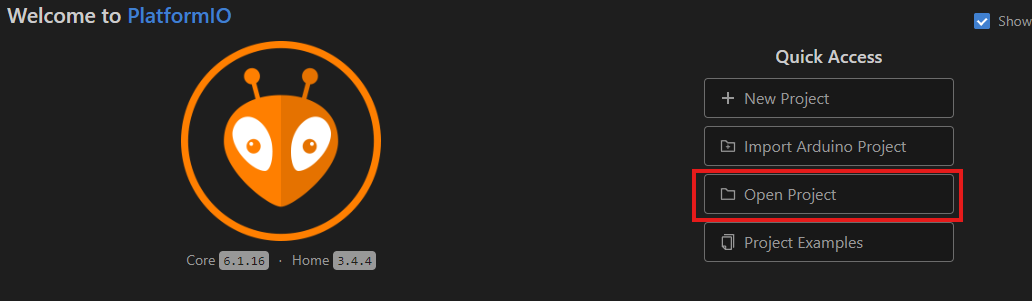


3. Conecte la planta por USB al computador. En la sección "Devices" de PlatformIO encontrará la lista de dispositivos conectados y sus respectivos puertos:

    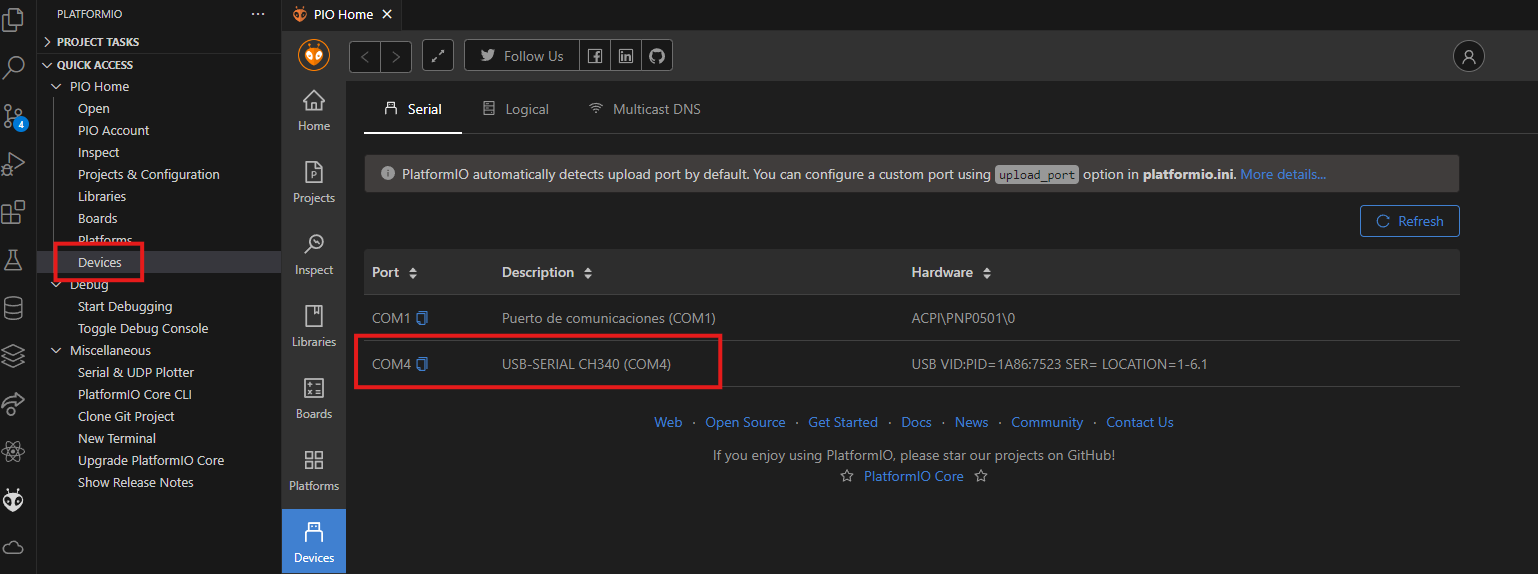

4. En el archivo "platformio.ini" establezca el puerto correspondiente a la planta en el valor "upload_port". Por ejemplo:
   
   

5. Para verficar que el puerto es correcto y que la comunicación con la planta es exitosa, puede iniciar la comunicación serial desde Visual Studio Code. 
   
   Dentro del archivo "platformio.ini", en la parte superior encontrará un boton para iniciar la comunicación serial con la planta:

   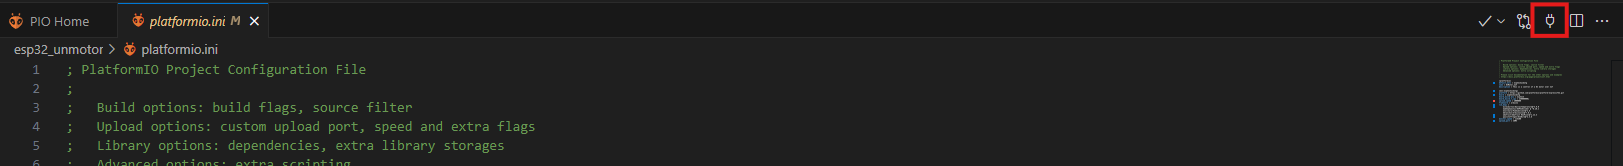

   Una vez haya empezado la comunicación, presione el boton de reinicio en la planta junto al puerto USB-C. Una vez hecho esto, observará un mensaje similar a este:

    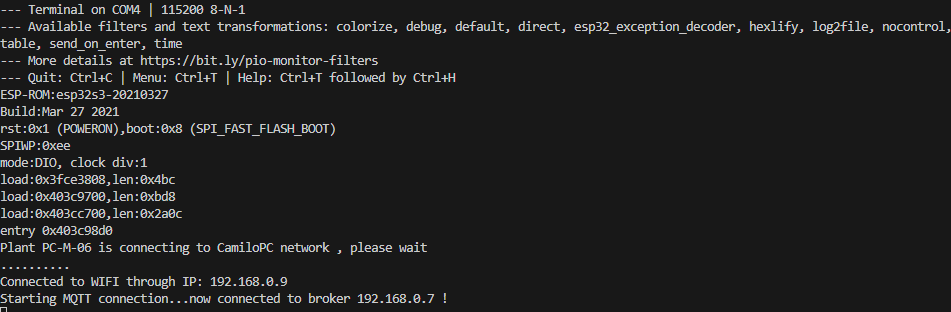

    De esta forma, la planta se esta comunicando correctamente por el puerto serial.

    
6. En el archivo "connection_settings.h" es necesario asegurarse de que las constantes esten correctamente definidas. Para el laboratorio de control se usará la siguiente configuración:

    <div class="alert alert-block alert-danger">
    ⚠️ Para usarse en el laboratorio de control, debe utilizar la siguiente configuración de red:

    * SSID: lab_control 
    * Password: lab_control
    * Broker: 192.168.1.100
    * Port: 1883
    </div>
   
    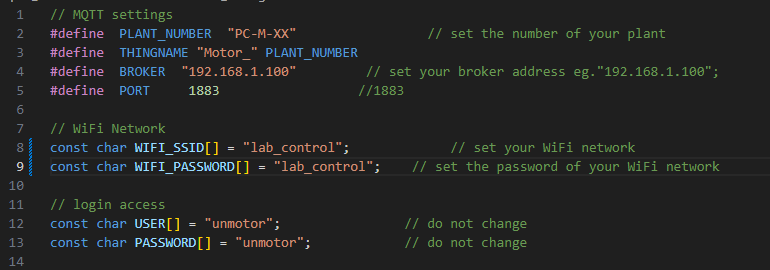

7. Para compilar el firmware encontrará un boton en la parte inferior de Visual Studio Code:

    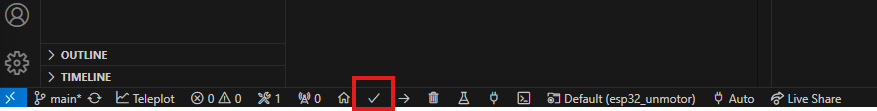

    Al presionar el boton, se abrirá una nueva terminal, se instalaran las dependencias y se compilará el proyecto. Si la compilación es correcta, obtendrá un mensaje de exito:

    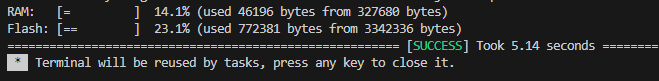

8. Posteriormente, podrá cargar el firmware actualizado a la planta. Para ello, encontrará otro boton en la parte inferior de Visual Studio Code:

    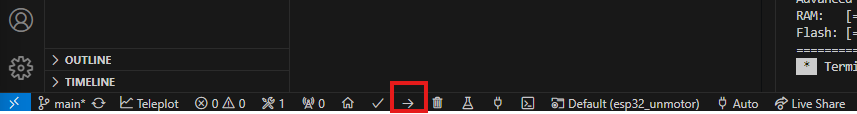

    Si el firmaware fue cargado correctamente, recivirá un mensaje de exito:
    
    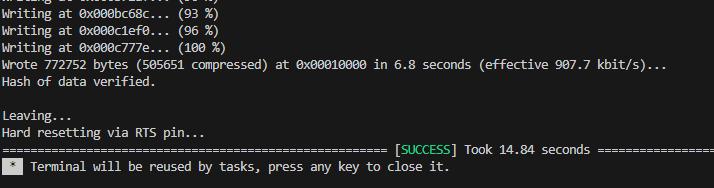

    Al presionar el boton de reinicio de la planta, por medio de la comunicación serial observará que la planta esta correctamente configurada:

    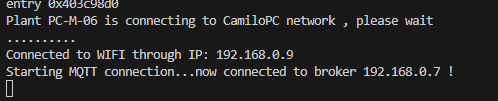

<h1 id="verificacion-de-instalación">Verificación de instalación</h1>

---

<div class="alert alert-block alert-warning">
⚠️ Desde este punto, podrá abrir la versión de este archivo con extención ".ipynb", es decir, un notebook de python.
</div>


Si todo está correctamente instalado y configurado, podrá ejecutar las siguientes celdas sin ningún error

### Instalación de Librerías
---

Estas librerías seran usadas constantemente a lo largo del curso

In [ ]:
#Instalación de UNThermal

!pip install git+https://github.com/nebisman/UNThermal.git@main#subdirectory=code/python_code --user


#Instalación de UNThermal

!pip install git+https://github.com/nebisman/UNDCMotor.git@main#subdirectory=code/python_code --user

# Otras librerías

!pip install matplotlib control

Si la instalación fue exitosa, la siguiente celda se debería ejecutar sin problemas:

In [1]:
import unthermal as term
import unmotor as motor
import control as ct
%matplotlib widget
import matplotlib.pyplot as plt

### Conexión con las placas de desarrollo
---

<div class="alert alert-block alert-danger">
⚠️ Para verificar la conexión de las placas es <bold>IMPORTANTE</bold> conectarse a la red del laboratorio:

* SSID: lab_control 
* Password: lab_control
</div>

## Planta Motor DC
---

Conecte la planta del motor DC por USB al computador. Está debería conectarse automáticamente a la red del laboratorio.

Los valores que se pasan en cada argumento deben ser consistentes con los que fueron establecidos en el firmware dentro del archivo "connection_settings.h"

In [ ]:
my_dcmotor = motor.MotorSystemIoT(plant_number = "PC-M-06", broker_address = "192.168.1.100") 

Al ejecutar la siguiente celda, la planta debería empezar el proceso de caracterización. Debido a ello, la rueda de la planta se movera y progresivamente se actualizará la grafica.

Connected successfully to MQTT Broker!
Subscribed:  1   (2,)


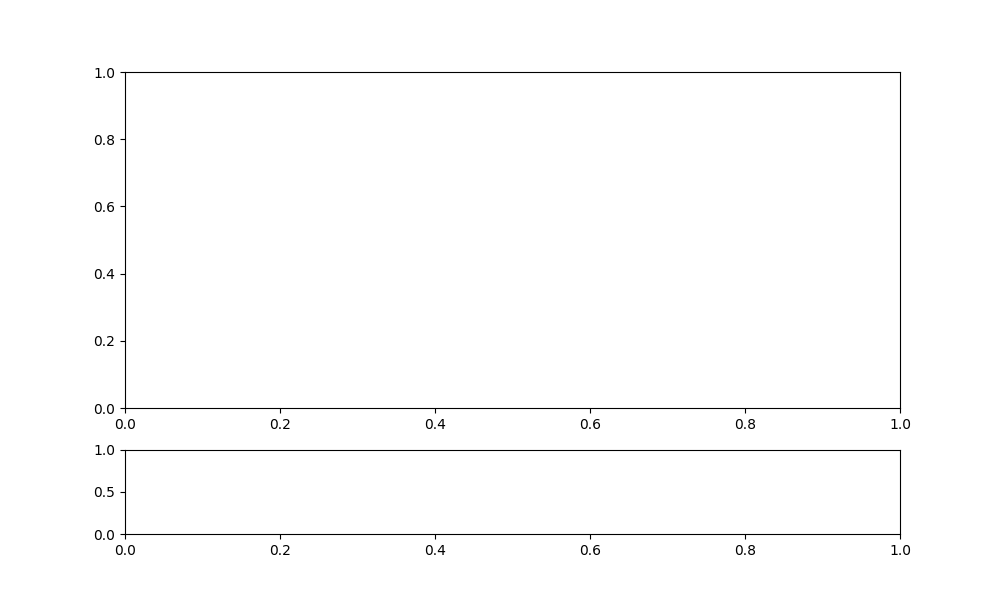

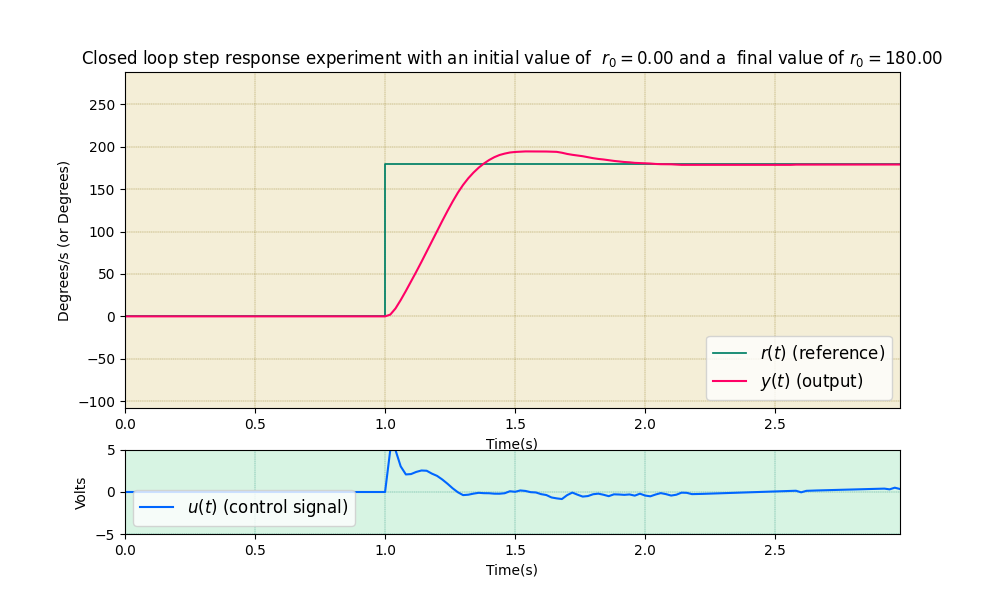

In [6]:
motor.step_closed(my_dcmotor, t0=1,t1=2, r0=0,r1=180)
plt.show()

## Planta Termica
---

Conecte la planta termica por USB al computador. Está debería conectarse automáticamente a la red del laboratorio.

Los valores que se pasan en cada argumento deben ser consistentes con los que fueron establecidos en el firmware dentro del archivo "connection_settings.h"

In [ ]:
my_temp = term.ThermalSystemIoT(plant_number = "PC-T-04", broker_address = "192.168.1.100") 

Al ejecutar la siguiente celda, la planta debería empezar el proceso de caracterización. De esta manera, progresivamente se añadirán los puntos a la gráfica, así mismo, verá como lentamente cambiarán los colores de los leds de la planta indicando el valor de las señales.

Successfully connected to MQTT Broker 192.168.0.9
Subscribed:  1   (2,)
Command send:  2


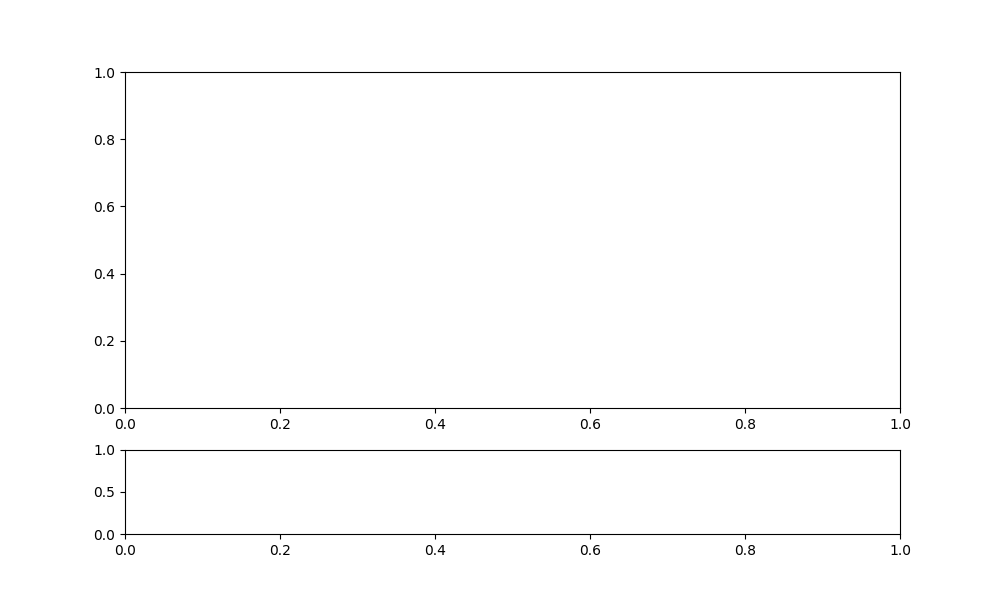

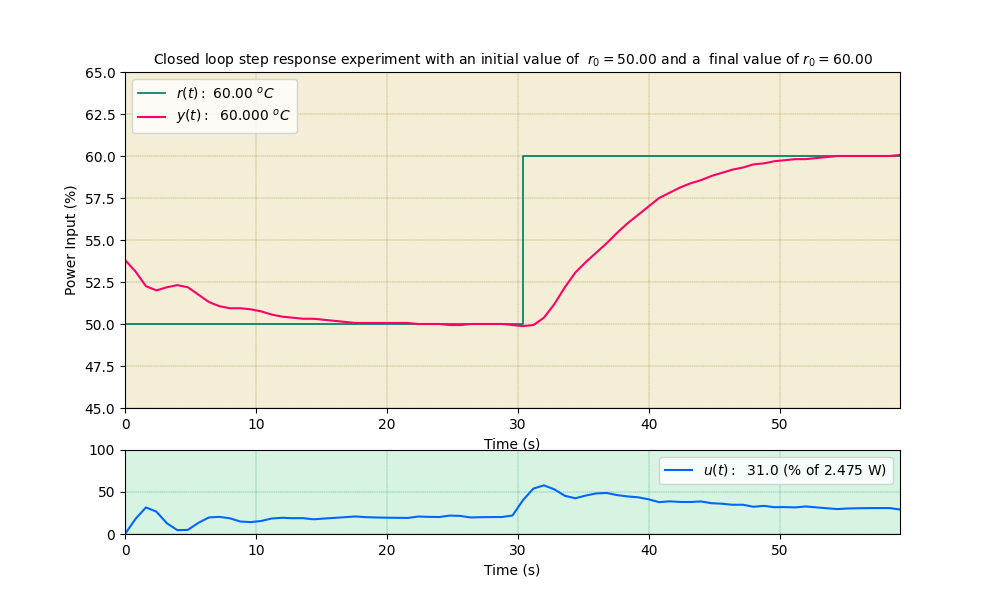

In [8]:
term.step_closed(my_temp, t0=30,t1=30, r0=50,r1=60)
plt.show()